In [2]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import style
style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [6]:
inspector_gadget = inspect(engine)
table_names = inspector_gadget.get_table_names()

In [8]:
table_names

['measurement', 'station']

In [30]:
for table in inspector.get_table_names():
    for column in inspector.get_columns(table):
        print(table + " " + column['name'])

measurement id
measurement station
measurement date
measurement prcp
measurement tobs
station id
station station
station name
station latitude
station longitude
station elevation


In [56]:
conn = engine.connect()
query = '''
    select * from Measurement
    where date like "%-06-%"
    '''
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,134,USC00519397,2010-06-01,0.00,78.0
1,135,USC00519397,2010-06-02,0.01,76.0
2,136,USC00519397,2010-06-03,0.00,78.0
3,137,USC00519397,2010-06-04,0.00,76.0
4,138,USC00519397,2010-06-05,0.00,77.0


In [59]:
df.sample(n=15)

,id,station,date,prcp,tobs
287,3259,USC00513117,2011-06-22,0.22,74.0
1511,17448,USC00516128,2011-06-13,0.41,68.0
1262,14535,USC00519281,2016-06-11,0.13,72.0
131,1568,USC00519397,2014-06-16,0.00,78.0
803,8988,USC00517948,2017-06-28,0.00,80.0
984,11122,USC00519523,2014-06-25,0.07,74.0
453,5384,USC00513117,2017-06-12,0.19,76.0
215,2653,USC00519397,2017-06-10,0.04,77.0
577,6679,USC00514830,2014-06-27,0.08,78.0
742,8417,USC00517948,2014-06-09,NaN,79.0


## D1: Determine the Summary Statistics for June

In [8]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract
# june = dt.date('', 6, '%d')

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").all()
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [11]:
pythonic_df = pd.DataFrame(results, columns = ["Date", "tobs"])
pythonic_df.head()

,Date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [12]:
len(pythonic_df)

1700

In [13]:
pythonic_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [82]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
conn = engine.connect()
query = '''
    select * from Measurement
    where date like "%-06-%"
    '''
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,134,USC00519397,2010-06-01,0.00,78.0
1,135,USC00519397,2010-06-02,0.01,76.0
2,136,USC00519397,2010-06-03,0.00,78.0
3,137,USC00519397,2010-06-04,0.00,76.0
4,138,USC00519397,2010-06-05,0.00,77.0


In [83]:
#  3. Convert the June temperatures to a list.
june_temps = pd.DataFrame(df.tobs)

In [85]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps.rename(columns = {'tobs':'June Temps'}, inplace = True)

In [86]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [130]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
conn = engine.connect()
query = '''
    select * from Measurement
    where date like "%-12-%"
    '''
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,306,USC00519397,2010-12-01,0.04,76.0
1,307,USC00519397,2010-12-03,0.00,74.0
2,308,USC00519397,2010-12-04,0.00,74.0
3,309,USC00519397,2010-12-06,0.00,64.0
4,310,USC00519397,2010-12-07,0.00,64.0


In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).
                      filter(func.strftime("%m", Measurement.date) == "12").all() 
results_dec

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [19]:
python_dec_df = pd.DataFrame(results_dec, columns = ["Date", "tobs"])
python_dec_df.head()

,Date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [20]:
python_dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [105]:
conn = engine.connect()
query = '''
    select strftime('%d', date) day, avg(prcp), avg(tobs)
    from Measurement
    where date like "%-12-%"
    group by day
    '''
df = pd.read_sql(query, conn)
df

,day,avg(prcp),avg(tobs)
0,01,0.172609,71.916667
1,02,0.321489,71.326923
2,03,0.246122,72.886792
3,04,0.180204,72.176471
4,05,0.120000,70.921569
5,06,0.046383,69.392157
6,07,0.022273,69.200000
7,08,0.041064,70.274510
8,09,0.106522,71.901961
9,10,0.414898,71.245283


In [103]:
len(df)

31

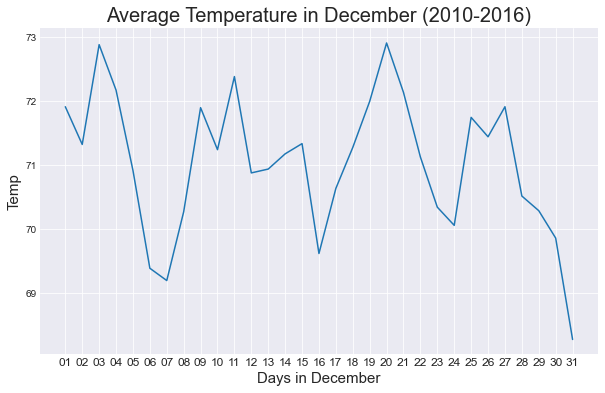

In [128]:
x = df.day
y = df['avg(tobs)'] 
z = df['avg(prcp)']
plt.figure(figsize=(10,6))


# Give our graph axis labels
plt.xlabel("Days in December", fontsize=15) ##, fontweight='bold')
plt.ylabel("Temp", fontsize=15) ##, fontweight='bold')
plt.title("Average Temperature in December (2010-2016)", fontsize=20) ##, fontweight='bold')

plt.xticks(fontsize=12)

plt.plot(x, y)

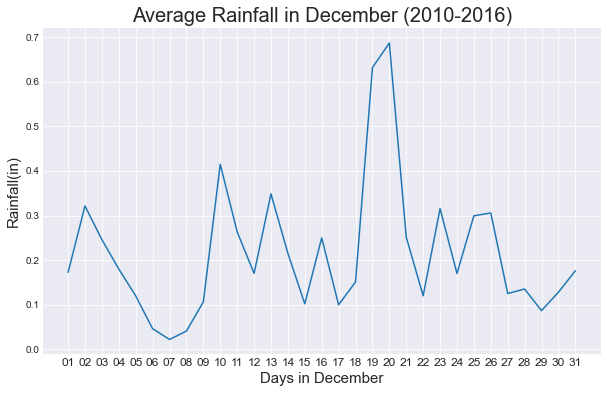

In [129]:
x = df.day
y = df['avg(tobs)'] 
z = df['avg(prcp)']
plt.figure(figsize=(10,6))
# Give our graph axis labels
plt.xlabel("Days in December", fontsize=15) ##, fontweight='bold')
plt.ylabel("Rainfall(in)", fontsize=15) ##, fontweight='bold')
plt.title("Average Rainfall in December (2010-2016)", fontsize=20) ##, fontweight='bold')

plt.xticks(fontsize=12)

plt.plot(x,z)

In [72]:
df[df.date == '2010-12-01']

,id,station,date,prcp,tobs
0,306,USC00519397,2010-12-01,0.04,76.0
210,3056,USC00513117,2010-12-01,0.76,73.0
426,5692,USC00514830,2010-12-01,0.03,73.0
604,7766,USC00517948,2010-12-01,0.70,72.0
732,9850,USC00519523,2010-12-01,0.03,78.0
942,12521,USC00519281,2010-12-01,1.35,72.0
1159,15282,USC00511918,2010-12-01,0.13,70.0
1311,17258,USC00516128,2010-12-01,1.48,71.0


In [88]:
# 7. Convert the December temperatures to a list.
dec_temps = pd.DataFrame(df.tobs)

In [89]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps.rename(columns = {'tobs':'December Temps'}, inplace = True)

In [90]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Extra Queries

In [52]:
conn = engine.connect()
query = '''
    select * from station;
    --limit 5;
    '''
df = pd.read_sql(query, conn)
df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [68]:
conn = engine.connect()
query = '''
    select s.station, s.name, s.elevation, avg(m.tobs), avg(m.prcp)
    from station s
    left join measurement m
        on s.station = m.station
    where m.date like "%-12-%"
    group by s.station;
    '''
merge_df = pd.read_sql(query, conn)
merge_df

,station,name,elevation,avg(m.tobs),avg(m.prcp)
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.9,69.684211,0.138146
1,USC00513117,"KANEOHE 838.1, HI US",14.6,71.069444,0.203241
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",7.0,73.224719,0.154966
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",152.4,69.291262,0.507005
4,USC00517948,"PEARL CITY, HI US",11.9,71.834862,0.152727
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",306.6,72.421053,0.638182
6,USC00519281,"WAIHEE 837.5, HI US",32.9,69.903226,0.244931
7,USC00519397,"WAIKIKI 717.2, HI US",3.0,71.109524,0.075314
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",19.5,72.433333,0.162010


In [58]:
conn = engine.connect()
query = '''
    select station, avg(tobs), avg(prcp)
    from Measurement m
    where date like "%-12-%"
    group by station;
    '''
df = pd.read_sql(query, conn)
df

,station,avg(tobs),avg(prcp)
0,USC00511918,69.684211,0.138146
1,USC00513117,71.069444,0.203241
2,USC00514830,73.224719,0.154966
3,USC00516128,69.291262,0.507005
4,USC00517948,71.834862,0.152727
5,USC00518838,72.421053,0.638182
6,USC00519281,69.903226,0.244931
7,USC00519397,71.109524,0.075314
8,USC00519523,72.433333,0.162010


In [49]:
conn = engine.connect()
query = '''
    select station, avg(tobs), avg(prcp)
    from Measurement
    where date like "%-06-%"
    --left join Station s
    --    on (m.station = s.station)
    group by station;
    '''
df = pd.read_sql(query, conn)
df

,station,avg(tobs),avg(prcp)
0,USC00511918,74.139394,0.015157
1,USC00513117,74.050847,0.118248
2,USC00514830,76.005376,0.114192
3,USC00516128,71.937220,0.495748
4,USC00517948,76.655405,0.057975
5,USC00518838,73.394737,0.094615
6,USC00519281,73.271186,0.151525
7,USC00519397,77.559322,0.022661
8,USC00519523,76.668103,0.050044


In [60]:
conn = engine.connect()
query = '''
    select station, avg(prcp)
    from Measurement
    where date like "%-06-%"
    --left join Station s
    --    on (m.station = s.station)
    group by station;
    '''
df = pd.read_sql(query, conn)
df

,station,avg(prcp)
0,USC00511918,0.015157
1,USC00513117,0.118248
2,USC00514830,0.114192
3,USC00516128,0.495748
4,USC00517948,0.057975
5,USC00518838,0.094615
6,USC00519281,0.151525
7,USC00519397,0.022661
8,USC00519523,0.050044


In [44]:
dec_prcp = pd.DataFrame(df.prcp)
dec_prcp.head()

,prcp
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [62]:
dec_prcp.rename(columns = {'prcp':'December Rainfall'}, inplace = True)

In [63]:
dec_prcp.describe()

,December Rainfall
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
